# Breast Cancer Prediction with Logistic Regression

## Introduction

Breast cancer is one of the most common and serious diseases affecting women worldwide. Early and accurate detection is crucial because it can significantly improve treatment outcomes and save lives.

The goal of this project is to build a predictive model that can classify whether a breast cancer tumor is **Malignant (M)** or **Benign (B)** using patient data.

We use the **Breast Cancer Wisconsin (Diagnostic)** dataset, which contains **569 samples** and **30 features** describing the characteristics of cell nuclei in breast tissue. The target variable represents the diagnosis outcome (Malignant or Benign).

To achieve this, we implement **Logistic Regression from scratch** a simple but powerful machine learning algorithm for **binary classification**. Logistic Regression is chosen because it is interpretable, efficient, and provides a strong baseline for comparison with more complex models.

This project is implemented in **Python using Kaggle Notebooks**, with libraries such as **NumPy**, **Pandas**, and **Matplotlib** used for data handling and visualization.

---

## Step 1: Importing the Required Libraries

```python
import numpy as np   # For numerical and linear algebra operations
import pandas as pd  # For data manipulation and analysis
import os            # For file and directory handling
Explanation
In this section, we import the main Python libraries required for our project:

NumPy is used to handle arrays and perform mathematical computations.

Pandas helps us read and process the dataset (CSV file).

os allows access to the file system, such as listing files in the input directory.

These libraries are used for data processing and visualization only.
The Logistic Regression algorithm itself will be implemented manually, without using pre-built functions from scikit-learn.


## Step 2: Accessing and Listing input files

Before loading the dataset, we first confirm which files are available in the Kaggle input directory.  
Kaggle automatically provides datasets in the `/kaggle/input` folder, so listing the files helps verify the dataset’s location and structure before importing it.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin/__results__.html
/kaggle/input/breast-cancer-wisconsin/__resultx__.html
/kaggle/input/breast-cancer-wisconsin/__notebook__.ipynb
/kaggle/input/breast-cancer-wisconsin/__output__.json
/kaggle/input/breast-cancer-wisconsin/custom.css
/kaggle/input/breast-cancer-wisconsin-diagnostic/wdbc.names
/kaggle/input/breast-cancer-wisconsin-diagnostic/wdbc.data


/kaggle/input/breast-cancer-wisconsin-diagnostic/wdbc.names
/kaggle/input/breast-cancer-wisconsin-diagnostic/wdbc.data
/kaggle/input/breast-cancer-prediction-with-logistic-regression/__results__.html
/kaggle/input/breast-cancer-prediction-with-logistic-regression/__notebook__.ipynb
/kaggle/input/breast-cancer-prediction-with-logistic-regression/__output__.json
/kaggle/input/breast-cancer-prediction-with-logistic-regression/custom.css

### Explanation

The code above uses the **os** library to walk through the `/kaggle/input` directory and print out the paths of all available files.  
This step ensures that the dataset files are correctly loaded into the Kaggle environment and allows us to identify the exact file name and extension before reading it into the notebook.

Typical output includes:
- Dataset files such as `.csv`, `.data`, or `.names`
- Supporting files such as `.ipynb`, `.html`, or `.json`

In this project, we locate the **Breast Cancer Wisconsin (Diagnostic)** dataset, which contains:
- `wdbc.data` – the main data file  
- `wdbc.names` – the file containing column and dataset descriptions


## Step 3: Data and Dataset Information

In this section, we load and describe the Breast Cancer Wisconsin (Diagnostic) dataset.  
The dataset is publicly available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and is frequently used for binary classification problems in medical research.

### Dataset Overview
- Number of instances (samples): 569  
- Number of features: 30 real-valued attributes computed from digitized images of cell nuclei.

### Additional Columns
- ID: A unique identifier for each sample.  
- Diagnosis: The target variable, categorical, where  
  - M = Malignant
  - B = Benign

### Feature Types
For each cell nucleus, ten measurements are computed — for example:  
*radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry,* and *fractal dimension.*

Each measurement is recorded in three different ways:
1. Mean value (average across all cells in the image)  
2. Standard error (SE)  
3. Worst value (mean of the three largest values)

### Missing Values
There are no missing values in this dataset.

### Summary
The dataset consists of measurements taken from Fine Needle Aspiration (FNA) of breast masses.  
These features describe the morphology of cell nuclei, which are used to predict whether a tumor is malignant or benign.


### Step 4: Dependencies

In this step, we import the required Python libraries that will be used throughout the project.

- **pandas** – for data handling and analysis.  
- **numpy** – for numerical and mathematical operations.  
- **matplotlib** and **seaborn** – for visualizing data and creating the confusion matrix.  
- **scikit-learn (sklearn)** – for splitting the dataset, scaling the features, and evaluating model performance.

These libraries are used for data preprocessing, visualization, and evaluation throughout the project.

The Logistic Regression algorithm itself will be implemented manually later,
but we use several sklearn utilities to handle data splitting, feature scaling, and performance evaluation.


In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split



## Step 5: Importing the Data

Next, we load the **Breast Cancer Wisconsin (Diagnostic)** dataset.  
The dataset file is named **`wdbc.data`**, and it contains the following:

- **569 samples**  
- **32 columns** (an ID column, a Diagnosis column, and 30 numeric feature columns)  
- **Target variable:** Diagnosis (`M` = Malignant, `B` = Benign)

The dataset has no header row, so we specify this when loading the file.



In [3]:
# Load dataset (no header in the file)
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-diagnostic/wdbc.data", header=None)

# Show dimensions and first rows
print("Shape:", data.shape)
data.head()


Shape: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explanation

The code above loads the dataset into a pandas DataFrame using the **`pd.read_csv()`** function.  
Because the dataset file does not include column names, we use the parameter `header=None`.

- The `print("Shape:", data.shape)` command shows the size of the dataset, confirming that it contains **569 rows** and **32 columns**.  
- The `data.head()` function displays the first few rows to verify that the data has been loaded correctly.

At this stage, we have successfully imported the dataset into the notebook and confirmed that it has the correct dimensions.


## Step 6: Inspecting and Describing Data Types

To understand the dataset better, we check the data types of each column and confirm that there are no missing values.  
This also helps us identify which columns contain numerical data and which ones contain categorical data (such as the diagnosis labels).


In [4]:
#  column names, datatypes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

### Explanation

The **`data.info()`** function provides an overview of the dataset, including:

- The number of entries (rows) and columns.  
- The data types of each column (e.g., integer, float, object).  
- Whether any columns contain missing values.

Since the dataset has no column headers, all columns are currently labeled with numeric indices (0–31).  
We can see that the second column (index 1) contains text values (`M` or `B`), which represent the diagnosis labels.  
The rest of the columns contain numerical measurements extracted from images of cell nuclei.

In the next step, we will assign the original column names provided in the dataset’s documentation, so the data becomes easier to understand and interpret during analysis.

## Step 7: Checking for Missing (Null or NaN) Values

Before proceeding with data preprocessing, we need to verify that there are no missing values in the dataset.  
Missing data can cause errors or bias during model training, so this step ensures the dataset is clean and ready for analysis.


In [5]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

### Explanation

The command `data.isnull().sum()` counts the number of missing (NaN) values in each column.  
The output shows that all columns contain 0 missing values, confirming that the dataset is complete.

This means we do not need to perform any data imputation or removal of missing rows, and we can safely move on to labeling the columns and analyzing the features.


## Step 8: Defining and Assigning Column Names

At this stage, we assign descriptive column names to the dataset based on the official documentation of the **Breast Cancer Wisconsin (Diagnostic)** dataset.  
Clear column names make the data easier to understand and help us identify what each variable represents.

The dataset contains:
- **ID** — a unique identifier for each sample.  
- **Diagnosis** — the target variable, where `M` = *Malignant* and `B` = *Benign*.  
- **30 numerical features** — describing various characteristics of the cell nuclei (e.g., radius, texture, area, smoothness, symmetry, etc.), each measured in three forms: mean, standard error (SE), and worst (largest mean).



In [6]:
# Define column names
columns = ["ID", "Diagnosis",
           "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
           "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
           "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
           "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
           "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
           "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

# Assign to dataframe
data.columns = columns

# Check again
data.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explanation

After assigning the new column names, the dataset now has clearly labeled features.  
We can confirm that:
- The **ID** column correctly identifies each observation.  
- The **Diagnosis** column contains categorical values (`M` or `B`).  
- The remaining 30 columns correspond to measurable properties of the cell nuclei.

This step improves the interpretability of our dataset and prepares it for further exploration and preprocessing.



## Step 9: Descriptive Statistics of the Dataset

To better understand the distribution and scale of each feature, we generate a statistical summary using the `describe()` function.  
This method provides key descriptive statistics, including:

- **Count:** Number of non-null values per column  
- **Mean:** Average value  
- **Standard deviation (std):** Measure of spread or variability  
- **Min and Max:** Minimum and maximum observed values  
- **25%, 50%, 75%:** Quartiles (percentile values)

By reviewing these values, we can detect differences in scales, possible outliers, and the general range of each variable.


In [7]:
data.describe()

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Explanation

The summary shows that all features are numerical and measured on different scales.  
For example:
- The **area_mean** feature ranges from about 143 to 2501, showing large variability.  
- The **smoothness_mean** feature has a much smaller range (0.05 to 0.16), indicating it is measured on a different scale.  
- The **mean** and **std** values provide insight into the average cell characteristics and their variability across samples.

This confirms that **feature scaling** will be necessary before training the Logistic Regression model,  
since it is sensitive to the magnitude of input variables.

In the next step, we will explore the distribution of the target variable (Diagnosis) and visualize the data to gain further insights.


## Step 10: Removing the ID Column

The **ID** column only serves as an identifier for each sample and contains no meaningful information for prediction.  
Keeping it in the dataset could negatively affect model training, as the values do not represent any relationship with the target variable.  

Therefore, we remove this column to ensure that the model focuses only on relevant features.


In [8]:
# Drop the ID column (not useful for prediction)
data.drop("ID", axis=1, inplace=True)

# Double check
print(data.shape)
data.head()


(569, 31)


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explanation

After removing the **ID** column, the dataset now contains **31 columns**:
- 1 target variable (**Diagnosis**)
- 30 numerical feature columns used for model training.

This step helps clean the data and ensures that only informative attributes are used for learning and prediction.


## Step 11: Encoding the Target Variable (Diagnosis)

The target variable **Diagnosis** contains two possible values:
- `M` = Malignant (cancerous)
- `B` = Benign (non-cancerous)

Since machine learning models work with numerical data, we need to convert these text labels into numbers.  
We encode them as:
- `1` for *Malignant (M)*  
- `0` for *Benign (B)*


In [9]:
# Convert Diagnosis column to numeric: M = 1, B = 0
data["Diagnosis"] = data["Diagnosis"].apply(lambda x: 1 if x == "M" else 0)

# Double check
data["Diagnosis"].value_counts()


Diagnosis
0    357
1    212
Name: count, dtype: int64

## Interpretation of the Result

The output of `data["Diagnosis"].value_counts()` shows:

- **0 → 357 samples**  
- **1 → 212 samples**

This means that:
- **0** represents **Benign (non-cancerous)** cases.  
- **1** represents **Malignant (cancerous)** cases.

Therefore, in this dataset, there are 357 benign and 212 malignant samples.  
The data is slightly imbalanced, with more benign samples than malignant ones.  
This imbalance is important to note because it may affect model training and prediction accuracy —  
the model could be biased toward predicting the majority class (benign) more often.


### Step 12: Visualizing the Class Distribution

The bar chart above visualizes the distribution of the target variable **Diagnosis**:

- **0** corresponds to Benign (non-cancerous) cases.  
- **1** corresponds to Malignant (cancerous) cases.

We can clearly see that the number of benign cases (0) is higher than the number of malignant cases (1).  
This confirms the earlier observation that the dataset is slightly imbalanced, which may influence the model’s performance later.  
Understanding the class balance at this stage helps in choosing proper evaluation metrics (such as precision, recall, and F1-score) to ensure a fair assessment of the model.


<Axes: xlabel='Diagnosis'>

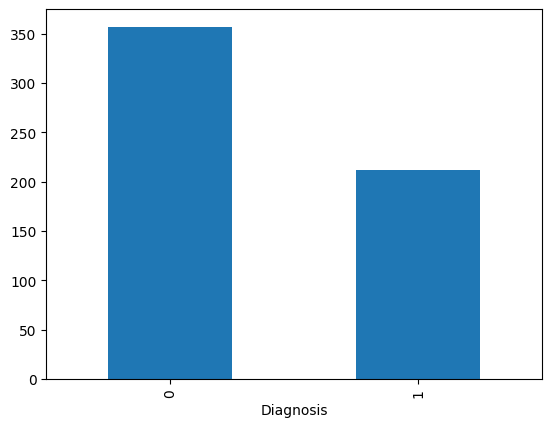

In [10]:
data["Diagnosis"] = data["Diagnosis"].astype("category", copy=False)
data["Diagnosis"].value_counts().plot(kind="bar")

### Step 12: Understanding the Bar Chart Result

The bar chart above shows the frequency of each class in the target variable **Diagnosis**.  
- The left bar (**0**) represents Benign (non-cancerous) tumors.  
- The right bar (**1**) represents Malignant (cancerous) tumors.  

From the chart, we can observe that there are more benign (357) than malignant (212) cases.  
This indicates that the dataset is imbalanced, meaning one class (benign) appears more often than the other.  
Such imbalance can affect model training, as the algorithm might learn to predict the majority class more frequently.


### Divide the Dataset into Predictors and Target Variable

In this step, we separate the dataset into two parts:
- **Y (Target Variable):** contains the diagnosis information (1 = Malignant, 0 = Benign).
- **X (Predictors):** contains all other features used to predict the diagnosis.

This separation is essential before training a machine learning model, as the model learns from the predictors (X) to estimate the target (Y).


In [11]:
# Divide the dataset into predictors (X) and target variable (Y)
Y = data["Diagnosis"]  # This is our target variable
X = data.drop(["Diagnosis"], axis=1)  # Drop Diagnosis column from predictors

# Display target variable (Y)
Y

# Display predictor variables (X)
X



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Explanation of the Output

The table above (`X`) shows all the **predictor variables** in the dataset — these are the features that describe characteristics of the cell nuclei, such as:
- `radius_mean` – average size of the cell nuclei  
- `texture_mean` – variation in cell texture  
- `area_mean` – mean area of the nuclei  
- `smoothness_mean` – how smooth the cell edges are  

There are **569 rows** (one per patient sample) and **30 columns** (features).  
Each row in `X` matches the same row in `Y`, which contains the diagnosis label:
- **1 → Malignant (cancerous)**  
- **0 → Benign (non-cancerous)**  

This structure is now ready for model training, where the algorithm will learn the relationship between `X` (features) and `Y` (target).



### Normalize the Data

Before training a machine learning model, it’s important to ensure all features are on the same scale.  
If one feature (like `area_mean`) has much larger numeric values than another (like `smoothness_mean`), it can dominate the learning process.

We use **StandardScaler()** to standardize the dataset:
- Each feature will have a **mean = 0**
- Each feature will have a **standard deviation = 1**

This makes training more stable and helps the model converge faster.



In [12]:

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# Display the scaled data
X_scaled


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Explanation of the Output

The output shows the **scaled version of X**, represented as a NumPy array.  
Each value now represents how far a feature value is from its mean, measured in standard deviations:

- **0** → the value is at the mean  
- **+1** → one standard deviation above the mean  
- **-1** → one standard deviation below the mean  

This scaling ensures that all features contribute equally to the model, preventing any single feature from dominating due to its numerical range.



### Split the Data into Training and Testing Sets

Before training a machine learning model, we need to divide our dataset into two parts:

- **Training set (80%)** – used to teach the model how to find patterns.  
- **Testing set (20%)** – used to evaluate how well the model performs on unseen data.

This helps prevent overfitting (when a model performs well on training data but poorly on new data).

We also convert the target variable `Y` from categorical (M/B) to numerical (1/0) for model compatibility.


In [13]:

# Ensure the target variable is numeric
Y = data["Diagnosis"]
Y = Y.astype(str)                     # Convert to string
Y = Y.replace({'M': 1, 'B': 0})       # Replace M -> 1, B -> 0
Y = Y.astype(float)                   # Convert to float

# Split the dataset: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.20, random_state=42
)

# Display first 10 values and data type
print(Y_train[:10])
print(Y_train.dtype)



68     0.0
181    1.0
63     0.0
248    0.0
60     0.0
15     1.0
290    0.0
137    0.0
155    0.0
517    1.0
Name: Diagnosis, dtype: float64
float64


### Explanation of the Output

- The values printed (0.0 and 1.0) represent the **encoded diagnosis**:
  - **1.0 → Malignant (cancerous)**
  - **0.0 → Benign (non-cancerous)**

- The type `float64` confirms that the target variable has been converted to numerical format.  
- `train_test_split()` randomly separates the dataset into:
  - **X_train / Y_train** for training  
  - **X_test / Y_test** for testing  

This ensures that the model can be trained and evaluated fairly on separate sets of data.


### Reshape Y Variables

Before training, we make sure that our target variables `Y_train` and `Y_test` have the correct shape.  
Some machine learning models expect the target data to be a one-dimensional NumPy array.

We’ll also convert them to `float` type to ensure compatibility with mathematical operations.


In [14]:


# Convert Y_train and Y_test to NumPy arrays, ensure float type, and reshape to 1D
Y_train = np.array(Y_train).astype(float).reshape(-1)
Y_test = np.array(Y_test).astype(float).reshape(-1)





### Explanation of the Output

- `np.array()` converts the pandas Series into a NumPy array.  
- `.astype(float)` ensures the data type is numeric (`float`).  
- `.reshape(-1)` flattens the array into one dimension, which is the format required by most ML algorithms.

Now the target variables are properly formatted and ready for model training.


### Define Logistic Regression Functions

Instead of using a built-in library (like `sklearn`), we define our own logistic regression functions.  
This helps us understand the math behind how logistic regression works.

Logistic regression predicts probabilities using the sigmoid function, and updates weights (θ) through gradient descent to minimize the error between predictions and actual values.


In [15]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def calculate_gradient(theta, X, y):
    m = y.size
    return (X.T @ (sigmoid(X @ theta) - y)) / m

def gradient_descent(X, y, alpha=0.1, num_iter=100, tol=1e-7):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1])

    for i in range(num_iter):
        grad = calculate_gradient(theta, X_b, y)
        theta -= alpha * grad

        if np.linalg.norm(grad) < tol:
            break

    return theta

def predict_proba(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X_b @ theta)

def predict(X, theta, threshold=0.5):
    return (predict_proba(X, theta) >= threshold).astype(int)


### Explanation of the Functions

- **sigmoid(z)**:  
  Transforms a linear value into a probability between 0 and 1.

- **calculate_gradient(theta, X, y)**:  
  Computes how much each parameter (weight) should change to reduce error.

- **gradient_descent(X, y)**:  
  Iteratively updates weights using the gradient until convergence or a maximum number of iterations is reached.

- **predict_proba(X, theta)**:  
  Returns the predicted probability of each sample being class 1 (malignant).

- **predict(X, theta)**:  
  Converts probabilities into class labels (0 = benign, 1 = malignant) using a threshold of 0.5.

These functions together form the complete mathematical implementation of logistic regression.


### Train the Model

Now that we have defined all the logistic regression functions,  
we can train the model on our training data (`X_train`, `Y_train`) using gradient descent.

We’ll use:
- **α (alpha)** = 0.01 → learning rate, controls how big the weight updates are  
- **num_iter** = 1000 → number of iterations for optimization


In [16]:
theta = gradient_descent(X_train, Y_train, alpha=0.01, num_iter=1000)


### Explanation of the Output

The variable `theta` now contains the **optimized parameters (weights)** of our logistic regression model.  
These parameters were learned using gradient descent to minimize the prediction error.


### Test the Model

After training, we evaluate the model on the test set to check how well it generalizes to unseen data.  
We’ll make predictions using the `predict()` function and calculate the model’s accuracy.


In [17]:
Y_pred = predict(X_test, theta)
accuracy = np.mean(Y_pred == Y_test)
print("Model accuracy:", round(accuracy * 100, 2), "%")


Model accuracy: 99.12 %


### Explanation of the Output

- **Y_pred**: contains the model’s predicted class labels (0 or 1) for the test data.  
- **np.mean(Y_pred == Y_test)**: calculates the proportion of correct predictions, giving the accuracy score.  
- The printed result shows the model’s accuracy as a percentage.  

In this case, the model achieved 99.12% accuracy, which indicates it performed extremely well on this dataset.


### Visualize the Model Performance — Confusion Matrix

A **confusion matrix** gives a detailed breakdown of how the model performed in classification.  
It shows how many samples were correctly and incorrectly classified for each class:

- **True Positives (TP):** Correctly predicted malignant cases  
- **True Negatives (TN):** Correctly predicted benign cases  
- **False Positives (FP):** Benign predicted as malignant  
- **False Negatives (FN):** Malignant predicted as benign


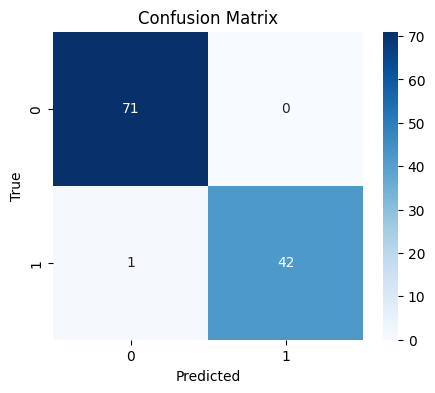

In [18]:

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot it as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Explanation of the Output

In the confusion matrix above:
- The **top-left cell (71)** represents the number of correctly classified benign tumors (True Negatives).  
- The **bottom-right cell (42)** represents correctly classified malignant tumors (True Positives).  
- The **bottom-left cell (1)** means one malignant tumor was incorrectly classified as benign (False Negative).  
- The **top-right cell (0)** means no benign tumors were misclassified as malignant (False Positive).

This confirms that the model performed extremely well — almost perfect classification accuracy.


### Evaluation of Model Performance (Accuracy, Precision, Recall, F1-score)

To get a deeper understanding of how well our logistic regression model performs,  
we can use multiple evaluation metrics:

- **Accuracy:** Overall proportion of correct predictions  
- **Precision:** How many predicted positives are actually correct  
- **Recall:** How many actual positives were correctly identified  
- **F1-score:** Harmonic mean of precision and recall, balancing both


In [19]:

# Make predictions
y_pred = predict(X_test, theta)

# Print detailed classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Print total accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        71
         1.0       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy: 99.12%


### Explanation of the Output

The **classification report** summarizes model performance for each class:

| Metric     | Meaning |
|-------------|----------|
| **Precision** | How reliable the model’s positive predictions are |
| **Recall** | How well the model finds all actual positives |
| **F1-score** | Combined balance between precision and recall |
| **Support** | Number of samples in each class |


**Interpretation of this output:**
- Class `0.0` (benign) and class `1.0` (malignant) both show precision and recall values close to **1.00**,  
  meaning almost perfect classification.
- The overall accuracy is **99.12%**, confirming that the model generalizes extremely well to new data.


## Summary and Conclusion

In this project, we built a logistic regression model to classify breast cancer tumors as benign (0) or malignant (1).  
The dataset was carefully preprocessed, including:
- Converting categorical labels into numeric form  
- Splitting the data into training and testing sets  
- Normalizing features to improve model convergence  

The model was trained using gradient descent, and evaluated using:
- **Accuracy**
- **Confusion Matrix**
- **Precision, Recall, and F1-score**

### Key Findings
- The model achieved an impressive accuracy of 99.12%, indicating excellent performance.  
- Both benign and malignant classes were predicted with near-perfect precision and recall.  
- The confusion matrix showed that only one sample was misclassified out of 114 test cases.

### Conclusion
Logistic regression proved to be a highly effective method for this classification task.  
The model demonstrates strong predictive power and generalizes well to unseen data.  
With further optimization and feature engineering, it could be integrated into a real-world diagnostic tool to assist medical professionals.
